In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

df = pd.read_csv('heart.csv')

In [14]:
#wyświetl dane
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
from sklearn import preprocessing as p
from sklearn.model_selection import train_test_split

#standaryzuj dane (bez ostatniej kolumny!) - żeby?? Standaryzacja dopadowuje do rozkładu normalnego. 
# Robi tak, że średnia danych wynosi 0 a odchylenie standardowe tam 1 chyba.
data = np.asarray(df)

X = data[:, 0:13] #zmienna X zawiera wszystkie pomiary od kolumny 0 do 12
y = data[:,13] #zmienna y zawiera etykietę (output)

data_ss = p.StandardScaler().fit_transform(X)
data_ss

#podziel dane na zbiór treningowy i walidacyjny
X_train, X_val, y_train, y_val = train_test_split(data_ss, y, test_size= 0.2)

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
#pierwsza siec neuronowa
model = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13)),
#       wchodza na 8 kolejnych, a funkcja aktywacji relu oznacza że nie niebędzie wartości ujemnych. 
        Dense(8, activation = 'relu'),  
        Dense(1)
])

In [51]:
#podsumowanie budowy i wielkości modelu
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 8)                 112       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
#kompilowanie modelu
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
#proces uczenia
# on się będzie uczyć 100 razy
EPOCHS = 100

history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 3.9778 - accuracy: 0.5331 - val_loss: 3.8471 - val_accuracy: 0.5082
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 3.7382 - accuracy: 0.5331 - val_loss: 3.8064 - val_accuracy: 0.5246
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.6363 - accuracy: 0.5372 - val_loss: 3.4543 - val_accuracy: 0.5246
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 3.5664 - accuracy: 0.5372 - val_loss: 3.3821 - val_accuracy: 0.5410
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 3.3659 - accuracy: 0.5413 - val_loss: 3.3749 - val_accuracy: 0.5738
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 3.1227 - accuracy: 0.5661 - val_loss: 3.5540 - val_accuracy: 0.5902
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 3.0846 - accuracy: 0.5702 - val_loss: 3.5026 - val_accuracy: 0.6230
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 1.5314 - accuracy: 0.6901 - val_loss: 1.4914 - val_accuracy: 0.7377
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 1.5291 - accuracy: 0.6901 - val_loss: 1.4874 - val_accuracy: 0.7377
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 1.5270 - accuracy: 0.6901 - val_loss: 1.4840 - val_accuracy: 0.7377
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 1.5248 - accuracy: 0.6901 - val_loss: 1.4799 - val_accuracy: 0.7377
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 1.5229 - accuracy: 0.6901 - val_loss: 1.4759 - val_accuracy: 0.7377
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 1.5207 - accuracy: 0.6901 - val_loss: 1.4718 - val_accuracy: 0.7377
Epoch 65/100
8/8 [==============================] - 0s 7ms/step - loss: 1.5187 - accuracy: 0.6901 - val_loss: 1.4692 - val_accuracy: 0.7377
Epoch 66/100
8/8 [===============

In [54]:
#zamiana wyników zapisanych w history na dataframe
hist = pd.DataFrame(history.history)

In [55]:
#wyświetl hist
hist

,loss,accuracy,val_loss,val_accuracy
0,3.977843,0.533058,3.847134,0.508197
1,3.738168,0.533058,3.806447,0.524590
2,3.636309,0.537190,3.454275,0.524590
3,3.566366,0.537190,3.382097,0.540984
4,3.365938,0.541322,3.374937,0.573770
...,...,...,...,...
95,1.235230,0.727273,1.178129,0.721311
96,1.234218,0.727273,1.176477,0.721311
97,1.233012,0.723140,1.174830,0.721311
98,1.231916,0.723140,1.173384,0.721311


loss musi spadać - wtedy wiemy że model się uczy. 
zbiór walidacyjny słóży nam zapobieganiu przeuczeniu, sprawdza jak ten model będzie się zachowywał w sytuacji 

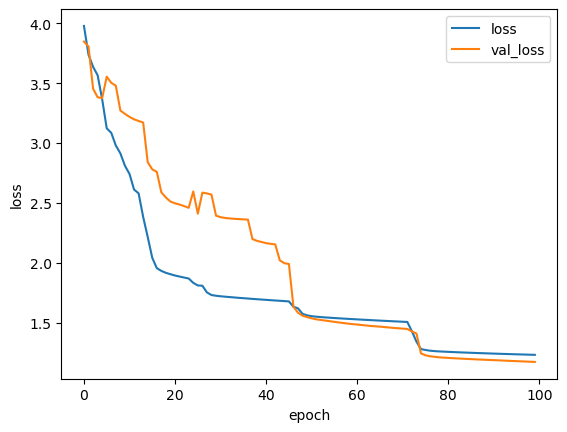

In [56]:
#proces uczenia na wykresie
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

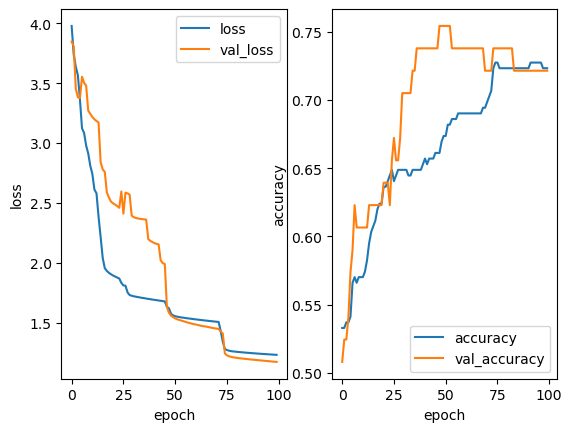

In [70]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [58]:
#stwórz model o dwóch warstwach ukrytych (64 i 8). Nadaj modelowi i historii uczenia unikalną nazwę
model_kasztan = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13)), 
        Dense(64, activation = 'relu'), 
        Dense(8, activation = 'relu'),
        Dense(1)
])

#podsumowanie budowy i wielkości modelu
model_kasztan.summary()

#kompilowanie modelu
model_kasztan.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#proces uczenia
# on się będzie uczyć 100 razy
EPOCHS = 100

history_kasztan = model_kasztan.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

#zamiana wyników zapisanych w history na dataframe
hist_kasztan = pd.DataFrame(history_kasztan.history)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                896       
                                                                 
 dense_41 (Dense)            (None, 8)                 520       
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1425 (5.57 KB)
Trainable params: 1425 (5.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 21ms/step - loss: 6.1619 - accuracy: 0.4752 - val_loss: 6.8751 - val_accuracy: 0.3770
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 5.2244 - accuracy: 0.4752 - val_loss: 5.7690 - val_accuracy: 0.3770
Epoch 

8/8 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.8884 - val_loss: 0.6034 - val_accuracy: 0.7705
Epoch 54/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2368 - accuracy: 0.8884 - val_loss: 0.6038 - val_accuracy: 0.7705
Epoch 55/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.8967 - val_loss: 0.6035 - val_accuracy: 0.7705
Epoch 56/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9008 - val_loss: 0.6027 - val_accuracy: 0.7705
Epoch 57/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2291 - accuracy: 0.9008 - val_loss: 0.6053 - val_accuracy: 0.7705
Epoch 58/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.9008 - val_loss: 0.6070 - val_accuracy: 0.7705
Epoch 59/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.9008 - val_loss: 0.6073 - val_accuracy: 0.7705
Epoch 60/100
8/8 [===============

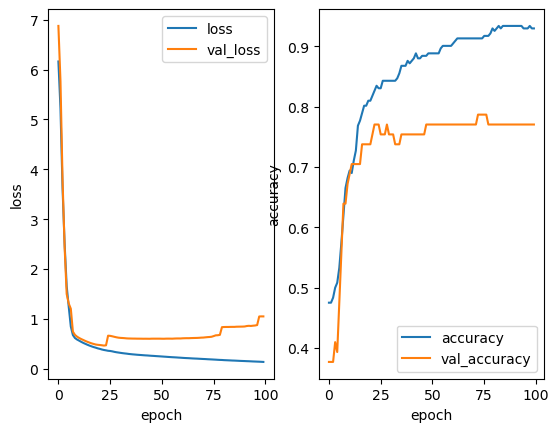

In [71]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist_kasztan.loss, label = "loss")
plt.plot(hist_kasztan.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_kasztan.accuracy, label = "accuracy")
plt.plot(hist_kasztan.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [60]:
#stwórz model o dwóch warstwach ukrytych (8 i 4). Nadaj modelowi i historii uczenia unikalną nazwę
model_grzyb = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13)), 
        Dense(8, activation = 'relu'), 
        Dense(4, activation = 'relu'),
        Dense(1)
])

#podsumowanie budowy i wielkości modelu
model_grzyb.summary()

#kompilowanie modelu
model_grzyb.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#proces uczenia
# on się będzie uczyć 100 razy
EPOCHS = 100

history_grzyb = model_grzyb.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

#zamiana wyników zapisanych w history na dataframe
hist_grzyb = pd.DataFrame(history_grzyb.history)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 8)                 112       
                                                                 
 dense_44 (Dense)            (None, 4)                 36        
                                                                 
 dense_45 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 2.0023 - accuracy: 0.5826 - val_loss: 1.4286 - val_accuracy: 0.5902
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 1.8590 - accuracy: 0.6240 - val_loss: 1.1592 - val_accuracy: 0.6230


8/8 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.7975 - val_loss: 0.4418 - val_accuracy: 0.7213
Epoch 54/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6478 - accuracy: 0.7975 - val_loss: 0.4413 - val_accuracy: 0.7213
Epoch 55/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6464 - accuracy: 0.8017 - val_loss: 0.4404 - val_accuracy: 0.7705
Epoch 56/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6446 - accuracy: 0.8017 - val_loss: 0.4402 - val_accuracy: 0.7705
Epoch 57/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.8017 - val_loss: 0.4401 - val_accuracy: 0.7541
Epoch 58/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.8017 - val_loss: 0.4405 - val_accuracy: 0.7541
Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.8017 - val_loss: 0.4401 - val_accuracy: 0.7541
Epoch 60/100
8/8 [===============

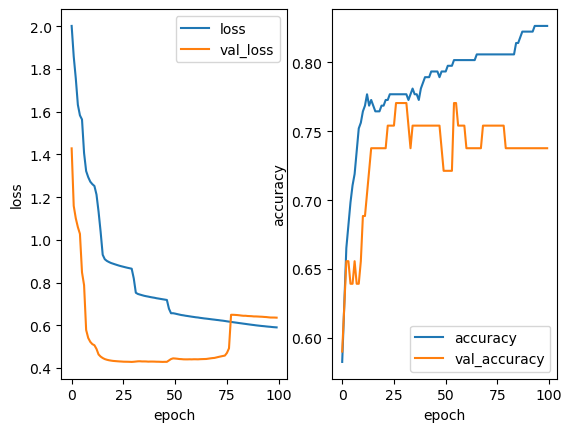

In [72]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist_grzyb.loss, label = "loss")
plt.plot(hist_grzyb.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_grzyb.accuracy, label = "accuracy")
plt.plot(hist_grzyb.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [61]:
#stwórz model o dwóch warstwach ukrytych (4 i 2). Nadaj modelowi i historii uczenia unikalną nazwę
model_sroka = Sequential([
#       13 neuronów wejściowych
        Input(shape = (13)), 
        Dense(8, activation = 'relu'), 
        Dense(4, activation = 'relu'),
        Dense(1)
])

#podsumowanie budowy i wielkości modelu
model_sroka.summary()

#kompilowanie modelu
model_sroka.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#proces uczenia
# on się będzie uczyć 100 razy
EPOCHS = 100

history_sroka = model_grzyb.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_val, y_val))

#zamiana wyników zapisanych w history na dataframe
hist_sroka = pd.DataFrame(history_sroka.history)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 8)                 112       
                                                                 
 dense_47 (Dense)            (None, 4)                 36        
                                                                 
 dense_48 (Dense)            (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5891 - accuracy: 0.8264 - val_loss: 0.6354 - val_accuracy: 0.7377
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5883 - accuracy: 0.8264 - val_loss: 0.6348 - val_accuracy: 0.7377


8/8 [==============================] - 0s 5ms/step - loss: 0.5521 - accuracy: 0.8554 - val_loss: 0.6414 - val_accuracy: 0.7869
Epoch 54/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.8554 - val_loss: 0.6408 - val_accuracy: 0.7869
Epoch 55/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5510 - accuracy: 0.8554 - val_loss: 0.6420 - val_accuracy: 0.7869
Epoch 56/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.8554 - val_loss: 0.6424 - val_accuracy: 0.7869
Epoch 57/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5497 - accuracy: 0.8554 - val_loss: 0.6431 - val_accuracy: 0.7869
Epoch 58/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.8554 - val_loss: 0.6439 - val_accuracy: 0.7869
Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.8512 - val_loss: 0.6441 - val_accuracy: 0.7869
Epoch 60/100
8/8 [===============

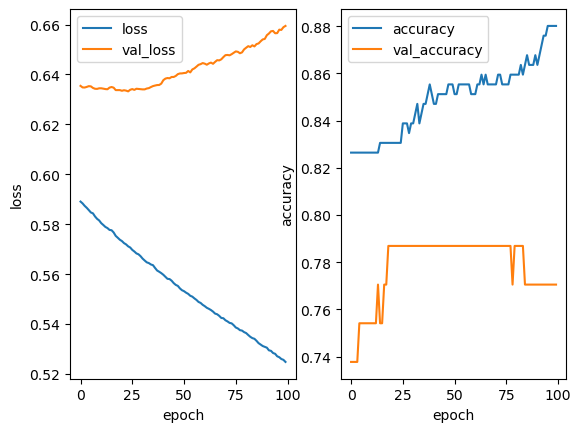

In [73]:
#za pomocą polecenia sublpot z lewej strony wyświetl loss, z prawej accuracy
plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist_sroka.loss, label = "loss")
plt.plot(hist_sroka.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_sroka.accuracy, label = "accuracy")
plt.plot(hist_sroka.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

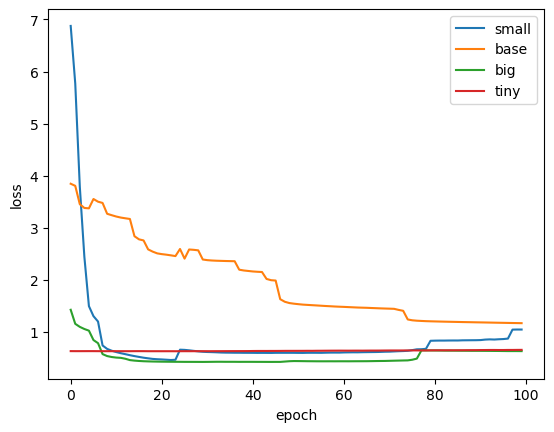

In [64]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia

plt.plot(hist_kasztan.val_loss, label = "small")
plt.plot(hist.val_loss, label = "base")
plt.plot(hist_grzyb.val_loss, label = "big")
plt.plot(hist_sroka.val_loss, label = "tiny")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

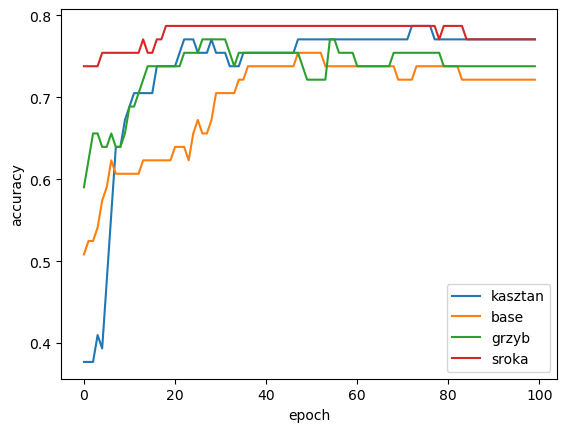

In [74]:
#zamiast hist_small, hist, hist_big, hist_tiny wstaw swoje nazwy historii uczenia
plt.plot(hist_kasztan.val_accuracy, label = "kasztan")
plt.plot(hist.val_accuracy, label = "base")
plt.plot(hist_grzyb.val_accuracy, label = "grzyb")
plt.plot(hist_sroka.val_accuracy, label = "sroka")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()